<a href="https://colab.research.google.com/github/matheo-angelo/Trabalho-PCD-III/blob/main/PCD_III_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usaremos a Metabolic Network

*Yamanishi, Y. and Vert, J.-P. (2005) Bioinformatics, 21, i468–i477.*


Usaremos uma rede metabólica. Nessa rede, proteínas (mais especificamente, enzimas) são indicadas pelo nome do gene que as codifica e arestas representam interações proteína-proteína.

# Obtendo os dados

In [1]:
!wget https://people.montefiore.uliege.be/schrynemackers/mn/gene_names.txt # Nome dos genes
!wget https://people.montefiore.uliege.be/schrynemackers/ppi/var_names.txt # Nome das features
!wget https://people.montefiore.uliege.be/schrynemackers/mn/X.txt # Valores das features
!wget https://people.montefiore.uliege.be/schrynemackers/mn/Y.txt # Matriz de adjacências

--2025-05-13 17:17:41--  https://people.montefiore.uliege.be/schrynemackers/mn/gene_names.txt
Resolving people.montefiore.uliege.be (people.montefiore.uliege.be)... 139.165.57.148
Connecting to people.montefiore.uliege.be (people.montefiore.uliege.be)|139.165.57.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6018 (5.9K) [text/plain]
Saving to: ‘gene_names.txt’

gene_names.txt      100%[===================>]   5.88K  --.-KB/s    in 0s      

2025-05-13 17:17:42 (214 MB/s) - ‘gene_names.txt’ saved [6018/6018]

--2025-05-13 17:17:43--  https://people.montefiore.uliege.be/schrynemackers/ppi/var_names.txt
Resolving people.montefiore.uliege.be (people.montefiore.uliege.be)... 139.165.57.148
Connecting to people.montefiore.uliege.be (people.montefiore.uliege.be)|139.165.57.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989 (3.9K) [text/plain]
Saving to: ‘var_names.txt’

var_names.txt       100%[===================>]   3.90K  --.-K

## Rede de interações

### Carregando os dados:

In [2]:
import numpy as np

# 1. Carregar os nomes dos nós
with open('gene_names.txt', 'r') as f:
    nomes_nos = f.read().splitlines()

# 2. Carregar a matriz de adjacência
matriz_adj = np.loadtxt('Y.txt', delimiter=',')

### Criando o grafo:

In [3]:
import networkx as nx
# Criar o grafo a partir da matriz de adjacência
G = nx.from_numpy_array(matriz_adj)

# Atribuir os nomes aos nós (usando dicionário de mapeamento)
mapping = {i: nome for i, nome in enumerate(nomes_nos)}
G = nx.relabel_nodes(G, mapping)

### Visualizando o grafo:

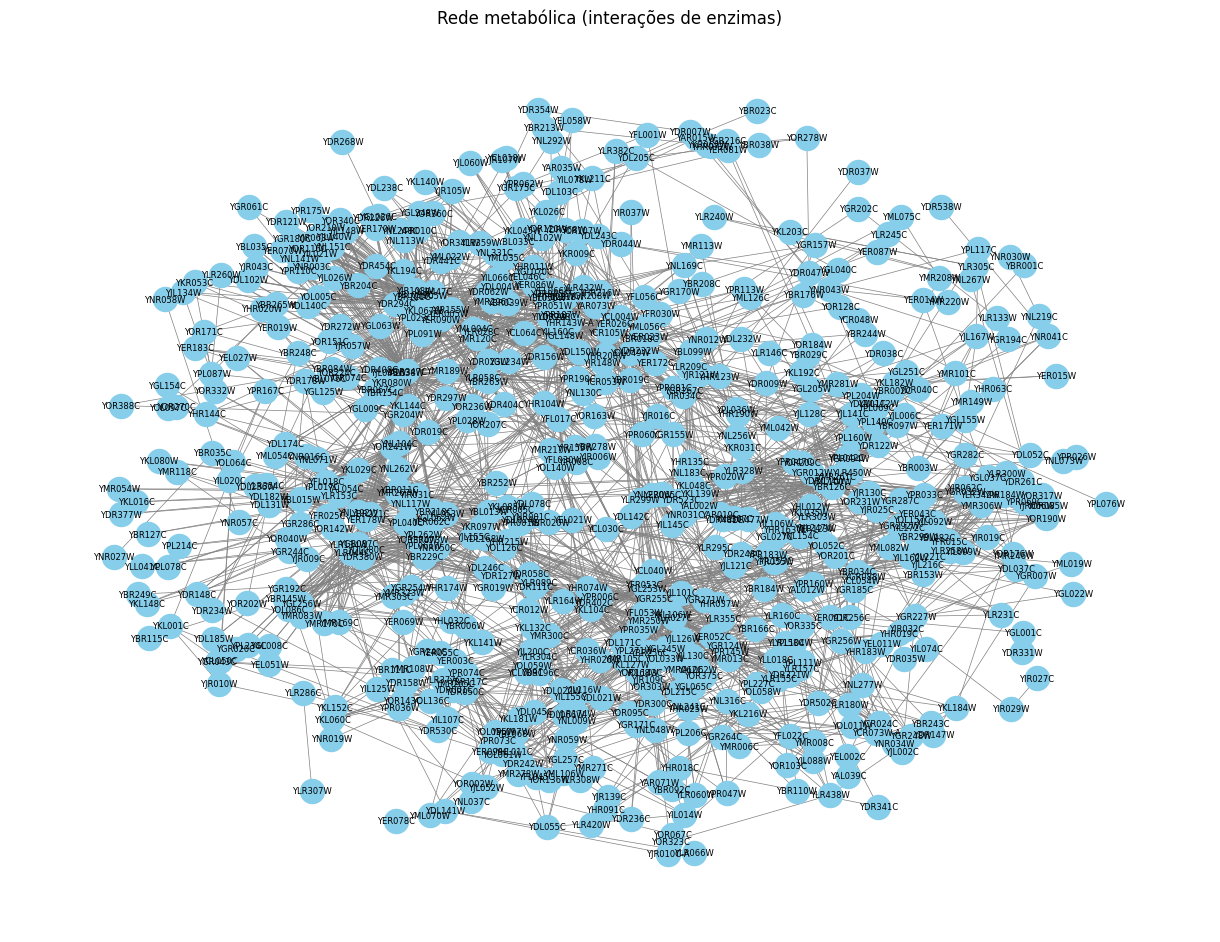

In [4]:
import matplotlib.pyplot as plt

# Configurar plot com zoom
plt.figure(figsize=(12, 9))
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Ajuste 'k' para espaçamento

nx.draw(G, pos, with_labels=True,
        node_size=300,
        font_size=6,
        node_color='skyblue',
        edge_color='gray',
        width=0.5)

plt.title("Rede metabólica (interações de enzimas)")
plt.show()

## Matriz de features

In [5]:
import pandas as pd
import numpy as np

with open('var_names.txt', 'r') as f:
    colunas = f.read().splitlines()

# Carregar valores - ajuste o delimiter conforme necessário
valores = np.loadtxt('X.txt', delimiter=',')

# Criar DataFrame
matriz_features = pd.DataFrame(valores, columns=colunas)

with pd.option_context('display.max_columns', None):
    display(matriz_features)

,CELL-CELL-CYCLE-ALPHA-FACTOR-1,CELL-CYCLE-ALPHA-FACTOR-2,CELL-CYCLE-ALPHA-FACTOR-3,CELL-CYCLE-ALPHA-FACTOR-4,CELL-CYCLE-ALPHA-FACTOR-5,CELL-CYCLE-ALPHA-FACTOR-6,CELL-CYCLE-ALPHA-FACTOR-7,CELL-CYCLE-ALPHA-FACTOR-8,CELL-CYCLE-ALPHA-FACTOR-9,CELL-CYCLE-ALPHA-FACTOR-10,CELL-CYCLE-ALPHA-FACTOR-11,CELL-CYCLE-ALPHA-FACTOR-12,CELL-CYCLE-ALPHA-FACTOR-13,CELL-CYCLE-ALPHA-FACTOR-14,CELL-CYCLE-ALPHA-FACTOR-15,CELL-CYCLE-ALPHA-FACTOR-16,CELL-CYCLE-ALPHA-FACTOR-17,CELL-CYCLE-ALPHA-FACTOR-18,CELL-CYCLE-CDC15-10M,CELL-CYCLE-CDC15-30M,CELL-CYCLE-CDC15-50M,CELL-CYCLE-CDC15-70M,CELL-CYCLE-CDC15-80M,CELL-CYCLE-CDC15-90M,CELL-CYCLE-CDC15-100M,CELL-CYCLE-CDC15-110M,CELL-CYCLE-CDC15-120M,CELL-CYCLE-CDC15-120M,CELL-CYCLE-CDC15-130M,CELL-CYCLE-CDC15-140M,CELL-CYCLE-CDC15-150M,CELL-CYCLE-CDC15-160M,CELL-CYCLE-CDC15-160M,CELL-CYCLE-CDC15-170M,CELL-CYCLE-CDC15-180M,CELL-CYCLE-CDC15-190M,CELL-CYCLE-CDC15-200M,CELL-CYCLE-CDC15-210M,CELL-CYCLE-CDC15-220M,CELL-CYCLE-CDC15-240M,CELL-CYCLE-CDC15-250M,CELL-CYCLE-CDC15-270M,CELL-CYCLE-CDC15-290M,CELL-CYCLE-ELUTRIATION-0.0HRS,CELL-CYCLE-ELUTRIATION-0.5HRS,CELL-CYCLE-ELUTRIATION-1.0HRS,CELL-CYCLE-ELUTRIATION-1.5HRS,CELL-CYCLE-ELUTRIATION-2.0HRS,CELL-CYCLE-ELUTRIATION-2.5HRS,CELL-CYCLE-ELUTRIATION-3.0HRS,CELL-CYCLE-ELUTRIATION-3.5HRS,CELL-CYCLE-ELUTRIATION-4.0HRS,CELL-CYCLE-ELUTRIATION-4.5HRS,CELL-CYCLE-ELUTRIATION-5.0HRS,CELL-CYCLE-ELUTRIATION-5.5HRS,CELL-CYCLE-ELUTRIATION-6.0HRS,CELL-CYCLE-ELUTRIATION-6.5HRS,CELL-CYCLE-CLN3-INDUCTION-30M,CELL-CYCLE-CLN3-INDUCTION-40M,CELL-CYCLE-CLB5-INDUCTION-40M,SPORULATION-0,SPORULATION-30M,SPORULATION-2H,SPORULATION-5H,SPORULATION-7H,SPORULATION-9H,SPORULATION-11H,SPORULATION-2H-,SPORULATION-7H-,SPORULATION-11H-,SPORULATION-NDT80--EARLY,SPORULATION-NDT80--MIDDLE,SPORULATION-NDT80OVER,DIAUXIC-SHIFT-19.0G/L,DIAUXIC-SHIFT-18.7G/L,DIAUXIC-SHIFT-17.6G/L,DIAUXIC-SHIFT-14.0G/L,DIAUXIC-SHIFT-7.5G/L,DIAUXIC-SHIFT-0.2G/L,DIAUXIC-SHIFT-0G/L,CLN3-1,CLN3-2,CLB2-2,CLB2-1,ALPHA0,ALPHA7,ALPHA14,ALPHA21,ALPHA28,ALPHA35,ALPHA42,ALPHA49,ALPHA56,ALPHA63,ALPHA70,ALPHA77,ALPHA84,ALPHA91,ALPHA98,ALPHA105,ALPHA112,ALPHA119,CDC15_10,CDC15_30,CDC15_50,CDC15_70,CDC15_80,CDC15_90,CDC15_100,CDC15_110,CDC15_120,CDC15_130,CDC15_140,CDC15_150,CDC15_160,CDC15_170,CDC15_180,CDC15_190,CDC15_200,CDC15_210,CDC15_220,CDC15_230,CDC15_240,CDC15_250,CDC15_270,CDC15_290,CDC28_0,CDC28_10,CDC28_20,CDC28_30,CDC28_40,CDC28_50,CDC28_60,CDC28_70,CDC28_80,CDC28_90,CDC28_100,CDC28_110,CDC28_120,CDC28_130,CDC28_140,CDC28_150,CDC28_160,ELU0,ELU30,ELU60,ELU90,ELU120,ELU150,ELU180,ELU210,ELU240,ELU270,ELU300,ELU330,ELU360,ELU390,AMBIGUOUS,MITOCHONDRION,VACUOLE,SPINDLE_POLE,CELL_PERIPHERY,PUNCTATE_COMPOSITE,VACUOLAR_MEMBRANE,ER,NUCLEAR_PERIPHERY,ENDOSOME,BUD_NECK,MICROTUBULE,GOLGI,LATE_GOLGI,PEROXISOME,ACTIN 1 NO,NUCLEOLUS,CYTOPLASM,ER_TO_GOLGI,EARLY_GOLGI,LIPID_PARTICLE,NUCLEUS,BUD,PHY-AAE,PHY-AFU,PHY-ANA,PHY-APE,PHY-ATC,PHY-ATH,PHY-ATU,PHY-BAB,PHY-BAN,PHY-BAS,PHY-BBU,PHY-BCE,PHY-BFL,PHY-BHA,PHY-BJA,PHY-BLO,PHY-BME,PHY-BMS,PHY-BSU,PHY-BTH,PHY-BUC,PHY-CAC,PHY-CBU,PHY-CCA,PHY-CCR,PHY-CEF,PHY-CEL,PHY-CGL,PHY-CJE,PHY-CMU,PHY-CPA,PHY-CPE,PHY-CPJ,PHY-CPN,PHY-CPT,PHY-CTC,PHY-CTE,PHY-CTR,PHY-DME,PHY-DRA,PHY-DRE,PHY-ECC,PHY-ECE,PHY-ECJ,PHY-ECO,PHY-ECS,PHY-ECU,PHY-EFA,PHY-FNU,PHY-HAL,PHY-HDU,PHY-HHE,PHY-HIN,PHY-HPJ,PHY-HPY,PHY-HSA,PHY-LIL,PHY-LIN,PHY-LLA,PHY-LMO,PHY-LPL,PHY-MAC,PHY-MBO,PHY-MGA,PHY-MGE,PHY-MJA,PHY-MKA,PHY-MLE,PHY-MLO,PHY-MMA,PHY-MMU,PHY-MPE,PHY-MPN,PHY-MPU,PHY-MTC,PHY-MTH,PHY-MTU,PHY-NEU,PHY-NMA,PHY-NME,PHY-OIH,PHY-PAB,PHY-PAE,PHY-PAI,PHY-PFA,PHY-PFU,PHY-PHO,PHY-PMA,PHY-PMM,PHY-PMT,PHY-PMU,PHY-PPU,PHY-PST,PHY-RBA,PHY-RCO,PHY-RNO,PHY-RPR,PHY-RSO,PHY-SAG,PHY-SAM,PHY-SAN,PHY-SAU,PHY-SAV,PHY-SCE,PHY-SCO,PHY-SEP,PHY-SFL,PHY-SFX,PHY-SMA,PHY-SME,PHY-SMU,PHY-SON,PHY-SPG,PHY-SPM,PHY-SPN,PHY-SPO,PHY-SPR,PHY-SPS,PHY-SPY,PHY-SSO,PHY-STM,PHY-STO,PHY-STT,PHY-STY,PHY-SYN,PHY-SYW,PHY-TAC,PHY-TEL,PHY-TMA,PHY-TPA,PHY-TTE,PHY-TVO,PHY-TWH,PHY-TWS,PHY-UUR,PHY-VCH,PHY-VPA,PHY-VVU,PHY-WBR,PHY-XAC,PHY-XCC,PHY-XFA,PHY-XFT,PHY-YPE,PHY-YPK
0,-0.5943

##  Análise de Centralidade

A análise de centralidade ajuda a identificar os nós (enzimas) mais importantes ou influentes na rede metabólica. Diferentes medidas de centralidade capturam diferentes aspectos de importância. Vamos calcular e analisar algumas das principais medidas de centralidade.

In [6]:
# Centralidade de Grau: Mede o número de conexões que um nó possui

centralidade_grau = nx.degree_centrality(G)

In [7]:
# Top 5 nós com maior centralidade de grau
top_n = 5
centralidade_grau_ordenada = sorted(centralidade_grau.items(), key=lambda item: item[1], reverse=True)
print(f"Top {top_n} nós com maior centralidade de grau.")
for i in range(min(top_n, len(centralidade_grau_ordenada))):
  print(f"{centralidade_grau_ordenada[i][0]}: {centralidade_grau_ordenada[i][1]:.4f}")

Top 5 nós com maior centralidade de grau.
YER005W: 0.1124
YAL038W: 0.1079
YOR347C: 0.1079
YKL067W: 0.0825
YKL106W: 0.0660


In [8]:
# Centralidade de Intermediação: Mede a frequência com que um nó aparece nos caminhos mais curtos entre outros pares de nós.
centralidade_inter = nx.betweenness_centrality(G)

In [9]:
# Top 5 nós com maior centralidade de intermediação
centralidade_inter_ordenada = sorted(centralidade_inter.items(), key=lambda item: item[1], reverse=True)
print(f"Top {top_n} enzimas por Centralidade de Intermediação:")
for i in range(min(top_n, len(centralidade_inter_ordenada))):
    print(f"{centralidade_inter_ordenada[i][0]}: {centralidade_inter_ordenada[i][1]:.4f}")

Top 5 enzimas por Centralidade de Intermediação:
YHR104W: 0.1207
YER005W: 0.0930
YBR184W: 0.0812
YAL038W: 0.0644
YOR347C: 0.0644


In [10]:
# Centralidade de Proximidade: Mede a quão próximo um nó está de todos os outros nós na rede.
centralidade_prox = nx.closeness_centrality(G)

In [11]:
# Top 5 nós com maior centralidade de proximidade
centralidade_prox_ordenada = sorted(centralidade_prox.items(), key=lambda item: item[1], reverse=True)
print(f"Top {top_n} enzimas por Centralidade de Proximidade:")
for i in range(min(top_n, len(centralidade_prox_ordenada))):
    print(f"{centralidade_prox_ordenada[i][0]}: {centralidade_prox_ordenada[i][1]:.4f}")

Top 5 enzimas por Centralidade de Proximidade:
YER073W: 0.2412
YOR374W: 0.2412
YPL061W: 0.2412
YKL106W: 0.2400
YLR027C: 0.2400


### Interpretação dos resultados de centralidade

Ao analisar as diferentes medidas de centralidade, observe:

- **Nós consistentemente altos**: Enzimas que aparecem no topo de múltiplas listas de centralidade são provavelmente cruciais para a estrutura e função de rede.

- **Diferenças entre medidas**: Algumas enzimas podem ser altas em grau (muitas conexões diretas) mas baixas em intermediação (não são pontes criticas), ou vice-versa. Essas diferenças revelam papéis distintos.

- **Contexto Biológico**: Relacione as enzimas identificadas com suas funções biológicas conhecidas. A centralidade delas faz sentido no contexto das vias metabólicas?

Essa análise inicial de centralidade fornece uma lista de enzimas candidatas para investigação mais aprofundada sobre seu papel na rede metabólica.

## Detecção de Comunidades

A detecção de comunidades visa encontrar grupos de nós (enzimas) que são mais densamente conectados entre si do que com o resto da rede. Em redes metabólicas, essas comunidades frequentemente correspondem a módulos fincionais ou vias metabólicas.

Usaremos o algoritmo de Louvain, que é eficiente e popular para esta tarefa.

In [13]:
!pip install python-louvain

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9459 sha256=faa60cfbbbc2f1ac88877f94befcaa033d4255a17a950e090701b78c092ab53f
  Stored in directory: /home/codespace/.cache/pip/wheels/40/f1/e3/485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


Número de comunidades detectadas: 23


/tmp/ipykernel_11236/4251936233.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


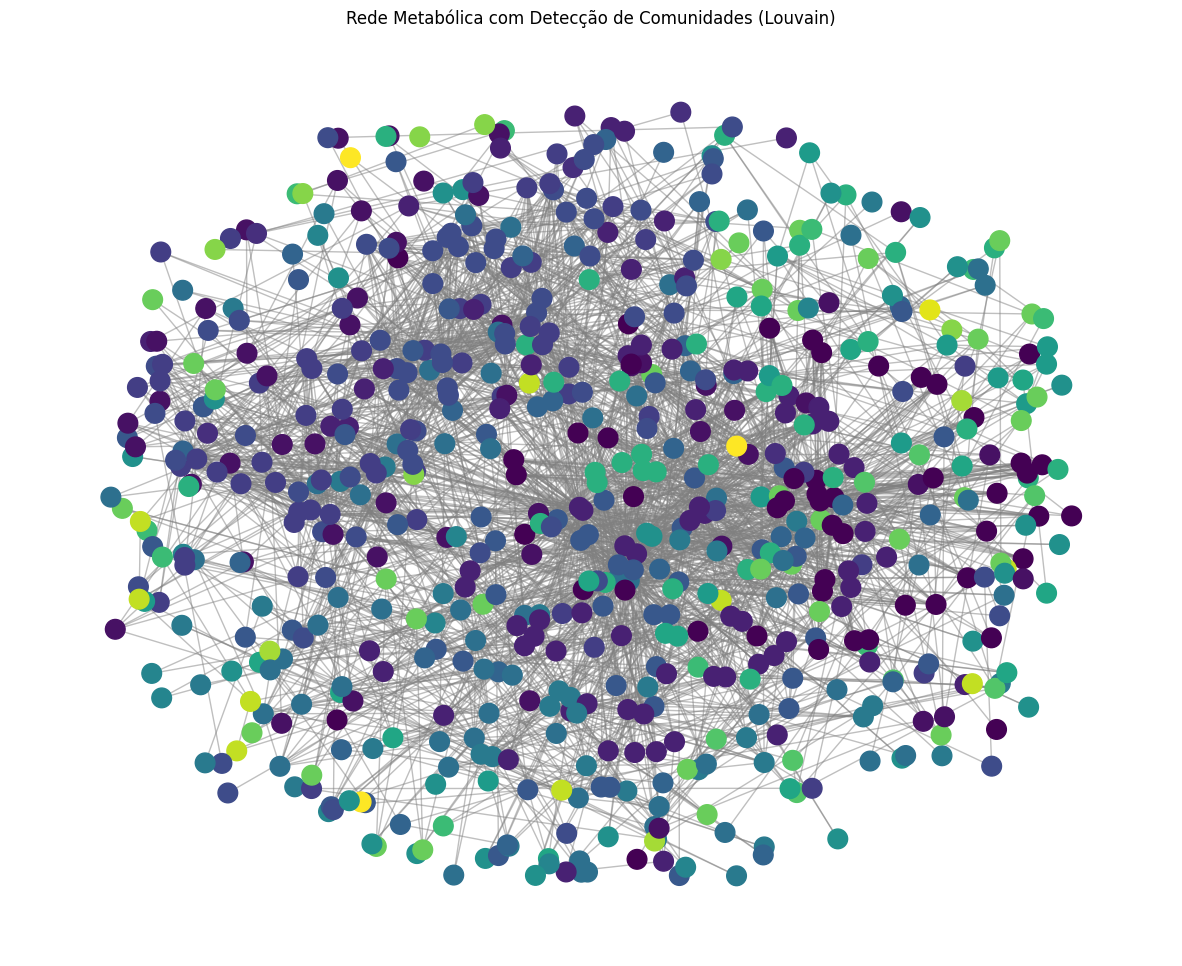

Modularidade da partição: 0.7724


In [14]:
# Detecção de Comunidades com o Algoritmo de Louvain
# Certifique-se de ter instalado: pip install python-louvain
import community.community_louvain as community_louvain_alg
import matplotlib.cm as cm

# Detectar comunidades
# O grafo G deve ser não direcionado para o algoritmo de Louvain como implementado em python-louvain
# Se G for direcionado, converta-o para não direcionado para esta análise específica ou use um algoritmo que suporte grafos direcionados.
if 'G' not in globals():
    print("Erro: Grafo G não definido. Por favor, carregue seu grafo primeiro.")
else:
    if nx.is_directed(G):
        print("O grafo G é direcionado. Convertendo para não direcionado para a detecção de comunidades com Louvain.")
        G_undirected = G.to_undirected()
    else:
        G_undirected = G

    partition = community_louvain_alg.best_partition(G_undirected)

    # Imprimir o número de comunidades encontradas
    num_comunidades = len(set(partition.values()))
    print(f"Número de comunidades detectadas: {num_comunidades}")

    # Mostrar algumas comunidades e seus membros (exemplo)
    # community_nodes = {}
    # for node, comm_id in partition.items():
    #     if comm_id not in community_nodes:
    #         community_nodes[comm_id] = []
    #     community_nodes[comm_id].append(node)
    # for i in range(min(3, num_communities)): # Mostrar as 3 primeiras comunidades
    #     print(f"Comunidade {i}: {community_nodes[i][:10]}... (mostrando até 10 membros)")

    # 5.2 Visualização das Comunidades
    # A visualização pode ser desafiadora para grafos grandes.
    # Aqui, tentamos colorir os nós de acordo com suas comunidades.

    plt.figure(figsize=(15, 12))
    # Usar o mesmo layout ou recalcular. Se G_undirected for muito grande, spring_layout pode ser lento.
    # Considere alternativas como nx.kamada_kawai_layout(G_undirected) ou nx.random_layout(G_undirected)
    # ou mesmo plotar apenas uma sub-amostra ou um componente principal.
    if G_undirected.number_of_nodes() < 1000: # Evitar layouts muito demorados para grafos grandes
        pos = nx.spring_layout(G_undirected, k=0.3, iterations=30)
    else:
        pos = nx.random_layout(G_undirected) # Fallback para grafos maiores

    # Gerar cores para as comunidades
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

    nx.draw_networkx_nodes(G_undirected, pos, partition.keys(), node_size=200,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G_undirected, pos, alpha=0.5, edge_color='gray')
    # nx.draw_networkx_labels(G_undirected, pos, font_size=6) # Adicionar labels pode poluir

    plt.title("Rede Metabólica com Detecção de Comunidades (Louvain)")
    plt.axis('off') # Desligar os eixos
    plt.show()

    # Calcular e imprimir a modularidade
    modularity = community_louvain_alg.modularity(partition, G_undirected)
    print(f"Modularidade da partição: {modularity:.4f}")


In [15]:
from collections import Counter

tam_comunidades = Counter(partition.values())

for com_id, tam in tam_comunidades.items():
    print(f"Comunidade {com_id}: {tam} nós")

Comunidade 0: 51 nós
Comunidade 1: 51 nós
Comunidade 2: 78 nós
Comunidade 15: 10 nós
Comunidade 4: 62 nós
Comunidade 5: 70 nós
Comunidade 6: 52 nós
Comunidade 7: 29 nós
Comunidade 8: 60 nós
Comunidade 9: 36 nós
Comunidade 14: 34 nós
Comunidade 11: 28 nós
Comunidade 12: 13 nós
Comunidade 13: 15 nós
Comunidade 16: 8 nós
Comunidade 17: 33 nós
Comunidade 18: 7 nós
Comunidade 10: 10 nós
Comunidade 20: 9 nós
Comunidade 21: 1 nós
Comunidade 22: 3 nós
Comunidade 3: 5 nós
Comunidade 19: 3 nós


### Interpretação dos Resultados da Detecção de Comunidades

- **Número e Tamanho das Comunidades**: Quantas comunidades foram encontradas? Elas são de tamanhos variados ou mais uniformes? Muitas comunidades pequenas podem indicar uma estrutura fragmentada, enquanto poucas comunidades grandes podem indicar módulos funcionais mais amplos.
- **Modularidade**: A modularidade é uma medida da força da divisão da rede em módulos. Valores mais altos (tipicamente > 0.3) indicam uma boa divisão em comunidades.
- **Análise Funcional (Passo Avançado)**: Para uma interpretação biológica mais profunda, você pode analisar as enzimas dentro de cada comunidade. Elas compartilham funções conhecidas ou participam das mesmas vias metabólicas? Ferramentas de enriquecimento funcional (e.g., usando ontologias gênicas como GO, ou bancos de dados de vias como KEGG) podem ser usadas aqui para identificar se certas funções ou vias são sobrerrepresentadas em comunidades específicas.

## Análise de Propriedades da Rede

A análise das propriedades globais da rede fornece insights sobre a arquitetura geral e as características da nossa rede metabólica. Essas métricas ajudam a entender quão conectada a rede é, se ela exibe propriedades de mundo pequeno ou livre de escala, e como ela se compara a outros tipos de redes.

Para algumas métricas, como o comprimento médio do caminho mais curto, é importante considerar se o grafo é conectado. Se não for, analisaremos o maior componente conectado (LCC - Largest Connected Component). O grafo `G_undirected` foi criado na seção de detecção de comunidades e será usado aqui se aplicável.

In [16]:
# Número de Nós e Arestas, Densidade e Grau Médio

if 'G_undirected' not in globals() or G_undirected is None:
    if nx.is_directed(G):
        print("Criando G_undirected a partir de G para análise de propriedades.")
        G_undirected = G.to_undirected()
    else:
        G_undirected = G

num_nodes = G_undirected.number_of_nodes()
num_edges = G_undirected.number_of_edges()
print(f"Número de nós (enzimas): {num_nodes}")
print(f"Número de arestas (interações): {num_edges}")

# Densidade da rede
density = nx.density(G_undirected)
print(f"Densidade da rede: {density:.4f}")

# Grau médio
if num_nodes > 0:
    avg_degree = 2 * num_edges / num_nodes
    print(f"Grau médio: {avg_degree:.4f}")
else:
    print("Grau médio: N/A (grafo sem nós)")

Número de nós (enzimas): 668
Número de arestas (interações): 2782
Densidade da rede: 0.0125
Grau médio: 8.3293


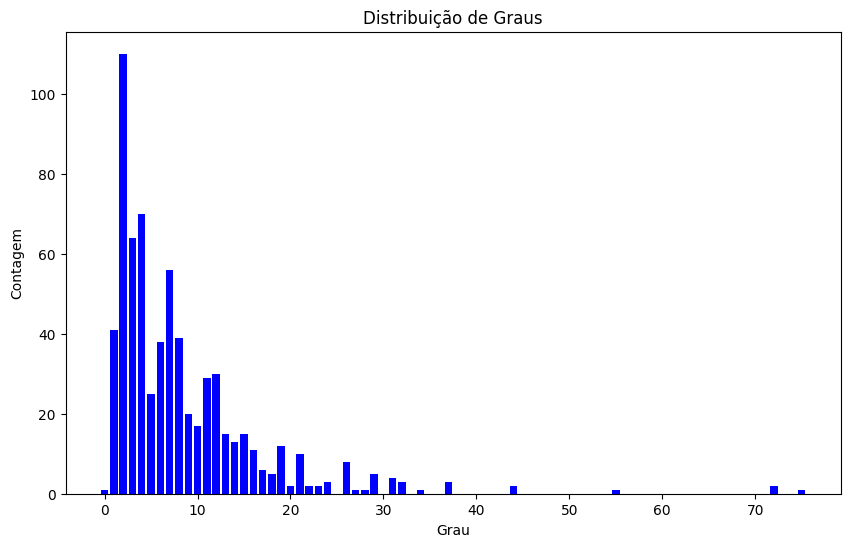

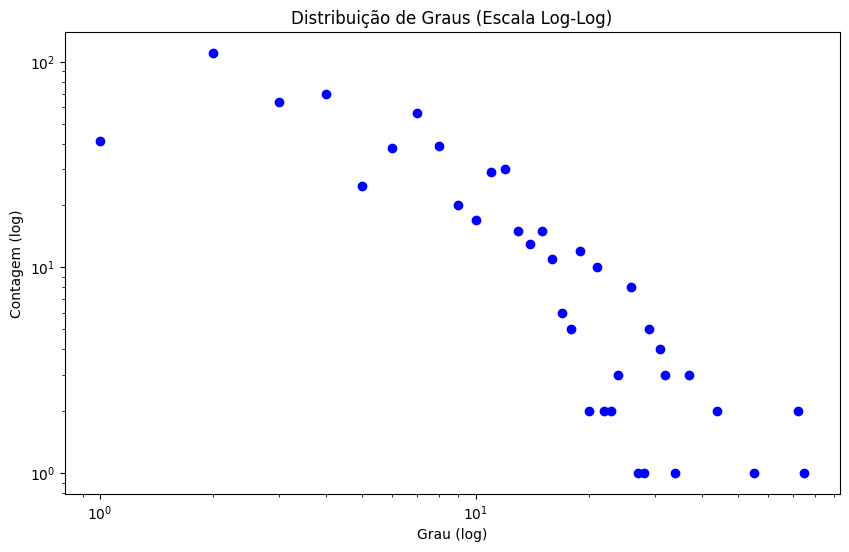

In [17]:
# Distribuição de Graus

import collections

degrees = [G_undirected.degree(n) for n in G_undirected.nodes()]
degree_counts = collections.Counter(degrees)
deg, cnt = zip(*degree_counts.items())

plt.figure(figsize=(10, 6))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Distribuição de Graus")
plt.xlabel("Grau")
plt.ylabel("Contagem")
plt.show()

# Plotar na escala log-log para verificar propriedades de rede livre de escala
plt.figure(figsize=(10, 6))
plt.loglog(deg, cnt, marker='o', linestyle='none', color='b')
plt.title("Distribuição de Graus (Escala Log-Log)")
plt.xlabel("Grau (log)")
plt.ylabel("Contagem (log)")
plt.show()

In [18]:
# Comprimento Médio do Caminho Mais Curto e Componentes Conectados

# Verificar se o grafo é conectado
is_connected = nx.is_connected(G_undirected)
print(f"O grafo é conectado? {is_connected}")

if is_connected:
    avg_shortest_path = nx.average_shortest_path_length(G_undirected)
    print(f"Comprimento médio do caminho mais curto: {avg_shortest_path:.4f}")
else:
    print("O grafo não é conectado. Analisando o maior componente conectado (LCC).")
    # Encontrar todos os componentes conectados
    connected_components = list(nx.connected_components(G_undirected))
    print(f"Número de componentes conectados: {len(connected_components)}")

    if connected_components:
        # Encontrar o maior componente conectado (LCC)
        lcc_nodes = max(connected_components, key=len)
        LCC = G_undirected.subgraph(lcc_nodes)
        print(f"Número de nós no LCC: {LCC.number_of_nodes()}")
        print(f"Número de arestas no LCC: {LCC.number_of_edges()}")

        # Calcular o comprimento médio do caminho mais curto para o LCC
        if LCC.number_of_nodes() > 1: # Precisa de pelo menos 2 nós para ter caminhos
            avg_shortest_path_lcc = nx.average_shortest_path_length(LCC)
            print(f"Comprimento médio do caminho mais curto no LCC: {avg_shortest_path_lcc:.4f}")
        else:
            print("LCC tem 1 nó ou menos, não é possível calcular o comprimento médio do caminho.")
    else:
        print("Nenhum componente conectado encontrado.")


O grafo é conectado? False
O grafo não é conectado. Analisando o maior componente conectado (LCC).
Número de componentes conectados: 7
Número de nós no LCC: 621
Número de arestas no LCC: 2714
Comprimento médio do caminho mais curto no LCC: 5.7190


In [19]:
# Coeficiente de Aglomeração Médio

# O coeficiente de aglomeração pode ser calculado para G_undirected
avg_clustering = nx.average_clustering(G_undirected)
print(f"Coeficiente de aglomeração médio: {avg_clustering:.4f}")

# Você também pode querer ver o coeficiente de aglomeração para cada nó
# clustering_coeffs = nx.clustering(G_undirected)
# print("Primeiros 5 coeficientes de aglomeração por nó:", dict(list(clustering_coeffs.items())[:5]))


Coeficiente de aglomeração médio: 0.3362


### Interpretação das Propriedades da Rede

- **Densidade**: Redes metabólicas são tipicamente esparsas (baixa densidade), indicando que apenas uma pequena fração das possíveis interações enzimáticas realmente ocorre.
- **Distribuição de Graus**: Se a distribuição de graus em escala log-log se assemelhar a uma reta, isso sugere uma rede livre de escala. Tais redes possuem hubs (nós com grau muito alto) e são robustas a falhas aleatórias, mas vulneráveis a ataques direcionados a esses hubs.
- **Comprimento Médio do Caminho Mais Curto e Coeficiente de Aglomeração**: Um baixo comprimento médio do caminho mais curto e um alto coeficiente de aglomeração são características de redes de "mundo pequeno". Isso implica que a rede é eficiente para a transferência de informação/fluxo metabólico e que existem módulos locais densamente conectados.
- **Componentes Conectados**: Se a rede não for totalmente conectada, a análise do LCC é crucial, pois representa a maior parte funcionalmente coesa da rede. Outros componentes menores podem representar vias periféricas ou artefatos de dados.

## Análise de Robustez

A análise de robustez examina quão bem a rede mantém sua integridade estrutural ou funcional quando submetida a perturbações, como a remoção de nós (enzimas). Isso é crucial para entender a estabilidade e resiliência do sistema metabólico.

Vamos simular dois cenários:
1.  **Ataque Direcionado**: Remoção de nós com base em sua importância (e.g., maior grau).
2.  **Falha Aleatória**: Remoção aleatória de nós.

Mediremos o impacto observando o tamanho do Maior Componente Conectado (LCC) da rede. Usaremos `G_undirected` que foi preparado nas seções anteriores.

In [20]:
import random

Simulações de robustez concluídas.


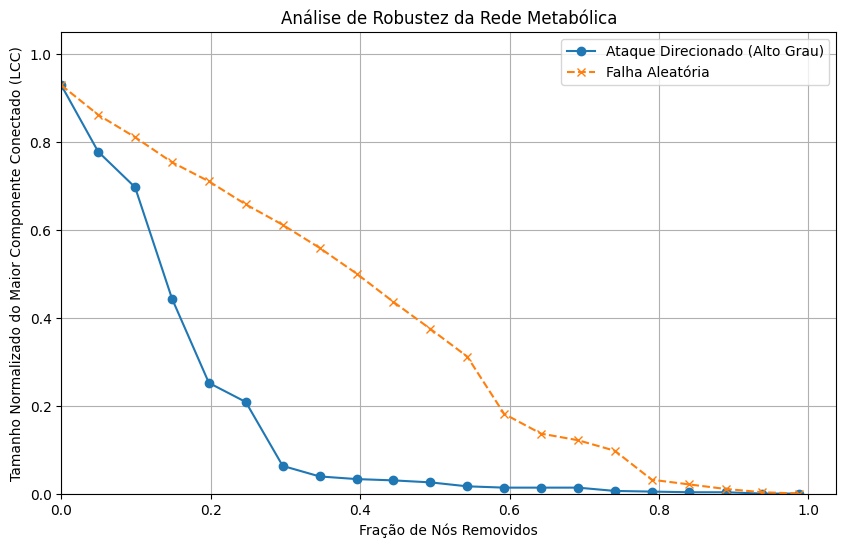

In [21]:
# 7.1 Simulação de Remoção de Nós e Cálculo da Robustez

# Função para calcular o tamanho do LCC após remover nós
def get_lcc_size(graph):
    if not graph.nodes():
        return 0
    if not nx.is_connected(graph):
        connected_components = list(nx.connected_components(graph))
        if not connected_components:
            return 0
        lcc_nodes = max(connected_components, key=len)
        return len(lcc_nodes)
    return graph.number_of_nodes()

# Assegurar que G_undirected existe e está definido
if 'G_undirected' not in globals() or G_undirected is None:
    if nx.is_directed(G):
        print("Criando G_undirected a partir de G para análise de robustez.")
        G_undirected = G.to_undirected()
    else:
        G_undirected = G

original_num_nodes = G_undirected.number_of_nodes()
if original_num_nodes == 0:
    print("Grafo original não tem nós. Análise de robustez não aplicável.")
else:
    # --- Ataque Direcionado (removendo nós de maior grau primeiro) ---
    G_targeted = G_undirected.copy()
    degrees_targeted = dict(G_targeted.degree())
    # Ordenar nós por grau decrescente
    nodes_sorted_by_degree = sorted(degrees_targeted, key=degrees_targeted.get, reverse=True)

    targeted_lcc_sizes = [get_lcc_size(G_targeted)] # LCC size before any removal
    # Definir a fração de nós a serem removidos em cada passo
    # Por exemplo, remover de 1% a 50% dos nós, em passos de 1% ou 5%
    # Para uma análise mais rápida, podemos usar passos maiores ou um limite menor
    #fractions_to_remove = [i/100 for i in range(1, 51, 5)] # Remover até 50% em passos de 5%
    num_steps = 20 # Número de pontos na curva de robustez
    nodes_to_remove_per_step = original_num_nodes // num_steps
    if nodes_to_remove_per_step == 0: nodes_to_remove_per_step = 1 # remover pelo menos 1

    removed_counts_targeted = [0]
    current_removed_count_targeted = 0

    for i in range(num_steps):
        nodes_to_remove_this_step = nodes_sorted_by_degree[current_removed_count_targeted : current_removed_count_targeted + nodes_to_remove_per_step]
        if not nodes_to_remove_this_step: break # Não há mais nós para remover
        G_targeted.remove_nodes_from(nodes_to_remove_this_step)
        targeted_lcc_sizes.append(get_lcc_size(G_targeted))
        current_removed_count_targeted += len(nodes_to_remove_this_step)
        removed_counts_targeted.append(current_removed_count_targeted)
        if not G_targeted.nodes(): break # Grafo ficou vazio

    # Normalizar o tamanho do LCC pelo número original de nós
    targeted_lcc_sizes_normalized = [s / original_num_nodes for s in targeted_lcc_sizes]
    removed_fractions_targeted = [c / original_num_nodes for c in removed_counts_targeted]

    # --- Falha Aleatória ---
    # Para obter uma curva mais suave, podemos repetir a remoção aleatória várias vezes e tirar a média
    # Aqui, para simplificar, faremos uma única execução.
    G_random = G_undirected.copy()
    nodes_random_order = list(G_random.nodes())
    random.shuffle(nodes_random_order)

    random_lcc_sizes = [get_lcc_size(G_random)]
    removed_counts_random = [0]
    current_removed_count_random = 0

    for i in range(num_steps):
        nodes_to_remove_this_step = nodes_random_order[current_removed_count_random : current_removed_count_random + nodes_to_remove_per_step]
        if not nodes_to_remove_this_step: break
        G_random.remove_nodes_from(nodes_to_remove_this_step)
        random_lcc_sizes.append(get_lcc_size(G_random))
        current_removed_count_random += len(nodes_to_remove_this_step)
        removed_counts_random.append(current_removed_count_random)
        if not G_random.nodes(): break

    random_lcc_sizes_normalized = [s / original_num_nodes for s in random_lcc_sizes]
    removed_fractions_random = [c / original_num_nodes for c in removed_counts_random]

    print("Simulações de robustez concluídas.")

    # 7.2 Plotar Curvas de Robustez
    plt.figure(figsize=(10, 6))
    plt.plot(removed_fractions_targeted, targeted_lcc_sizes_normalized, marker='o', linestyle='-', label='Ataque Direcionado (Alto Grau)')
    plt.plot(removed_fractions_random, random_lcc_sizes_normalized, marker='x', linestyle='--', label='Falha Aleatória')
    plt.title('Análise de Robustez da Rede Metabólica')
    plt.xlabel('Fração de Nós Removidos')
    plt.ylabel('Tamanho Normalizado do Maior Componente Conectado (LCC)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1.05) # Eixo Y de 0 a 1
    plt.xlim(0, max(removed_fractions_targeted[-1], removed_fractions_random[-1] if removed_fractions_random else 0) * 1.05) # Ajustar limite X
    plt.show()


### Interpretação dos Resultados da Análise de Robustez

- **Comparação das Curvas**: Observe a diferença entre a curva de ataque direcionado e a de falha aleatória.
    - Se a rede for significativamente mais afetada por ataques direcionados (a curva do LCC cai mais rapidamente) do que por falhas aleatórias, isso é típico de redes livres de escala (scale-free). Tais redes são robustas a falhas aleatórias, mas vulneráveis à remoção de seus hubs (nós altamente conectados).
    - Se as curvas forem semelhantes, a rede pode não ter uma estrutura hierárquica forte ou hubs proeminentes.
- **Ponto Crítico**: Existe uma fração de nós removidos onde o LCC se desintegra rapidamente? Isso pode indicar um limiar de percolação ou um ponto de vulnerabilidade crítica da rede.
- **Contexto Biológico**: As enzimas cuja remoção (nos ataques direcionados) causa o maior impacto são conhecidas por serem essenciais ou por participarem de vias metabólicas centrais? Isso pode ajudar a identificar vulnerabilidades no sistema metabólico.

Esta análise fornece uma visão sobre a estabilidade estrutural da rede metabólica frente a diferentes tipos de perturbações.